In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from tqdm.notebook import  trange,tqdm
import matplotlib.pyplot as plt


In [2]:
def create_data(data_points):
    data_class1= torch.rand(data_points,2)*1.45
    data_class2 = torch.rand(data_points,2)*3
    
    
    mask = ~((data_class2[:,0]<1.55)*(data_class2[:,1]<1.55))
    
    data_class2= data_class2[mask]
    data_label1= torch.zeros(data_class1.shape[0],1)
    data_lable2= torch.ones(data_class2.shape[0],1)
    
    x_data= torch.cat((data_class1,data_class2),0)
    y_data = torch.cat((data_label1,data_lable2),0)
    
    return x_data, y_data
    
    

In [3]:
x_train, y_train = create_data(1000)
x_test, y_test = create_data(500)

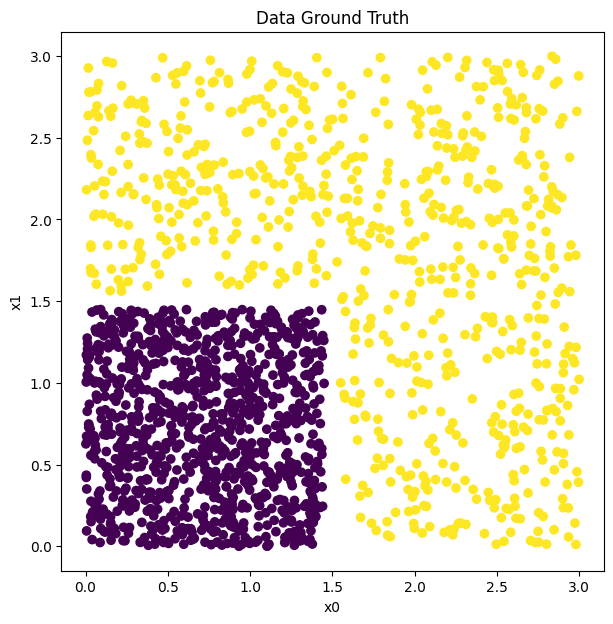

In [4]:

plt.figure(figsize=(7,7))
plt.scatter(x_train[:,0].numpy(),x_train[:,1].numpy(),c=y_train.flatten().numpy())
_=plt.xlabel("x0")
_=plt.ylabel("x1")
_=plt.title("Data Ground Truth")

In [13]:
logistic_reg= nn.Linear(2,1)
loss_funct= nn.BCEWithLogitsLoss()
logistic_optim= torch.optim.Adam(logistic_reg.parameters(),lr=0.1)

max_epoch=100
logistic_loss_log= []
logistic_acc= []

for epoch in range(max_epoch):
    with torch.no_grad():
        y_test_hat= logistic_reg(x_test)
        
        
        class_pred= (y_test_hat>0).float()
        logistic_acc.append(float(sum(class_pred==y_test))/len(y_test))
    
    
    y_train_hat= logistic_reg(x_train)  
    loss= loss_funct(y_train_hat, y_train)
    logistic_optim.zero_grad()
    loss.backward()
    logistic_optim.step()
    
    logistic_loss_log.append(loss.item())  
 
print("acc of linear model (GD):", logistic_acc[-1]*100)        
        

acc of linear model (GD): 92.0780711825488


In [ ]:
# print(len(y_test))
# print(float(y_test.shape[0]))
# print("------------------------")
# print(y_test.shape)
# print("--------------------------------")
# print(y_test)
